# Aplicación S&P500 y Naftrac


### Varianza
$$
\sigma_p^2 = \sum_{i=1}^{n} \sum_{k=1}^{n} w_i w_k \sigma_{ik} 
$$

Caso dos activos $(a,b)$:

$$\sigma^2_p = w_a^2 \sigma^2_a + w_b^2 \sigma_{b}^2 + 2 w_a w_b cov(a,b)$$

$$\sigma^2_p \neq w_a^2 \sigma^2_a + w_b^2 \sigma_{b}^2 $$





### Valor esperado
$$E[r_p]=E\left[\sum_{i=1}^{n}w_ir_i\right]=\sum_{i=1}^{n}w_iE\left[r_i\right]  $$


Caso dos activos $(a,b)$:
$$E[r_b] = w_1 \mu_r1 + w_2 \mu_r2 $$



***Nota: para este caso, no tenemos probabilidades asignadas por evento. La probabilidad de cada evento es entonces $\frac{1}{n}$***


Si queremos sacar el $w$ que minimiza la varianza de un portafolio:
$$w = \frac{\sigma^2_2 - cov(r_1, r_2)}{\sigma^2_1 + \sigma^2_2 - 2cov(r_1, r_2)} $$



In [1]:
# Bajamos los ETF de yahoo
import yfinance as yf
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

tickers = ['VOO', 'NAFTRAC.MX']
start_date = '2015-01-01'
St = yf.download(tickers, start=start_date)['Close']


[*********************100%%**********************]  2 of 2 completed


In [2]:
# Obten los rendimientos
rt = St.pct_change()

### Recordando

Si tenemos rendimientos diarios y los queremos convertir anual:
$$E[r_{anual}] = E[r_i] * 252 $$

Para el caso de la volatilidad, tenemos que multiplicar por raíz de 252
$$\sigma[r_{anual}] = \sigma_{ri} * \sqrt{252} $$



In [3]:
# Obten rendimientos anuales
df = pd.DataFrame()
df['rendimiento'] = rt.mean() * 252
df['volatilidad'] = rt.std() * np.sqrt(252)

In [4]:
df.iloc[0]

rendimiento    0.045111
volatilidad    0.155676
Name: NAFTRAC.MX, dtype: float64

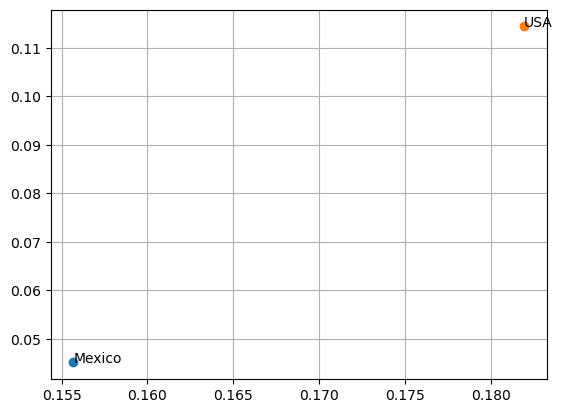

In [6]:
# Grafique los portafolios 
plt.scatter(df.iloc[0]['volatilidad'], df.iloc[0]['rendimiento'])
plt.text(df.iloc[0]['volatilidad'], df.iloc[0]['rendimiento'], 'Mexico')
plt.scatter(df.iloc[1]['volatilidad'], df.iloc[1]['rendimiento'])
plt.text(df.iloc[1]['volatilidad'], df.iloc[1]['rendimiento'], 'USA')
plt.grid()

# ¿Cómo se verá un portafolio con diversos pesos en México y estados unidos? crea 100 portafolios


In [7]:
np.linspace(0,1,100)

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

In [9]:
# Pesos
w_mx = np.linspace(0,1,100)
w_us = 1 - w_mx

# Valores esperados individuales
ve_mx = rt['NAFTRAC.MX'].mean()
ve_us = rt['VOO'].mean()

# Varianzas individuales
var_mx = rt['NAFTRAC.MX'].var()
var_us = rt['VOO'].var()

# Volatilidades individuales
vol_mx = rt['NAFTRAC.MX'].std()
vol_us = rt['VOO'].std()

# Covarianza 
cov_mx_us = rt.cov()['VOO']['NAFTRAC.MX']

portafolios = pd.DataFrame({
    'w_mx':w_mx,
    'w_us':w_us,
    'rendimiento':w_mx * ve_mx + w_us * ve_us,
    'varianza':w_mx**2 * var_mx + w_us**2 * var_us + 2*w_mx*w_us*cov_mx_us,
})
portafolios['rendimiento_anual'] = portafolios['rendimiento'] * 252
portafolios['volatilidad_anual'] = np.sqrt(portafolios['varianza']) * np.sqrt(252)
portafolios

,w_mx,w_us,rendimiento,varianza,rendimiento_anual,volatilidad_anual
0,0.000000,1.000000,0.000454,0.000131,0.114383,0.181944
1,0.010101,0.989899,0.000451,0.000130,0.113683,0.180908
2,0.020202,0.979798,0.000448,0.000128,0.112983,0.179882
3,0.030303,0.969697,0.000446,0.000127,0.112283,0.178866
4,0.040404,0.959596,0.000443,0.000126,0.111584,0.177861
...,...,...,...,...,...,...
95,0.959596,0.040404,0.000190,0.000093,0.047910,0.153241
96,0.969697,0.030303,0.000187,0.000094,0.047210,0.153825
97,0.979798,0.020202,0.000185,0.000095,0.046510,0.154426
98,0.989899,0.010101,0.000182,0.000095,0.045811,0.155043


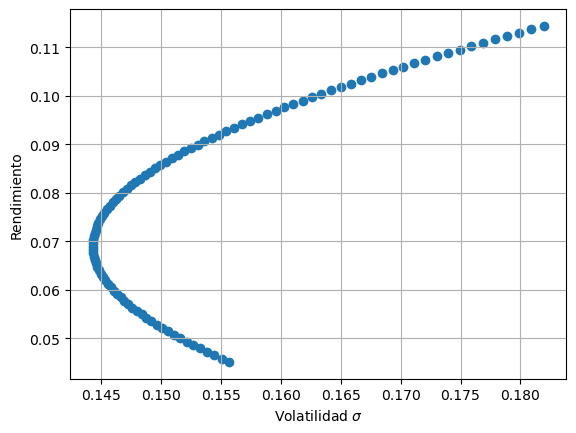

In [13]:
# Grafica los rendimientos
plt.scatter(portafolios['volatilidad_anual'], portafolios['rendimiento_anual'])
plt.xlabel('Volatilidad $\sigma$')
plt.ylabel('Rendimiento')
plt.grid()

In [16]:
# ¿Cuál es el portafoio con varianza mínima?
portafolio_varianza_minima = portafolios[portafolios.volatilidad_anual == portafolios.volatilidad_anual.min()]

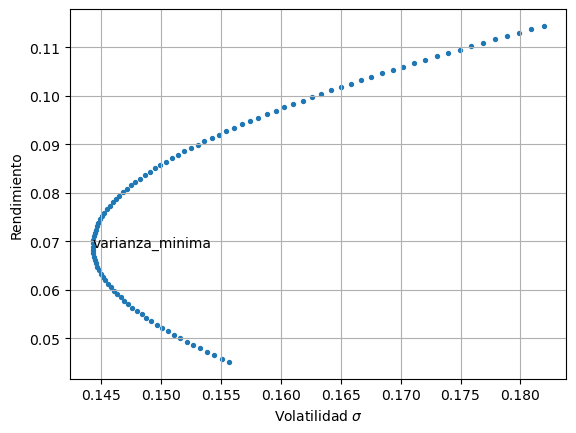

In [20]:
plt.scatter(portafolios['volatilidad_anual'], portafolios['rendimiento_anual'], s=8)
plt.text(portafolio_varianza_minima['volatilidad_anual'], portafolio_varianza_minima['rendimiento_anual'], 
         'varianza_minima')
plt.xlabel('Volatilidad $\sigma$')
plt.ylabel('Rendimiento')
plt.grid()

# Varianza mínima de forma anaítica

En este casi, $w$ será el peso que le demos a USA

$$w = \frac{\sigma^2_2 - cov(r_1, r_2)}{\sigma^2_1 + \sigma^2_2 - 2cov(r_1, r_2)} $$


In [21]:
portafolio_varianza_minima

,w_mx,w_us,rendimiento,varianza,rendimiento_anual,volatilidad_anual
65,0.656566,0.343434,0.000273,0.000083,0.068901,0.144298


In [22]:
w_varianza_minima = (var_us - cov_mx_us) / (var_mx + var_us - 2 * cov_mx_us)
w_varianza_minima

0.6548009629904904

In [33]:
# ¿Cual es esta varianza?


In [34]:
# Grafique los portafolios



# Haciendolo de forma matricial

### Varianza
$$
\sigma_p^2 = \sum_{i=1}^{n} \sum_{k=1}^{n} w_i w_k \sigma_{ik} = w^T \Sigma w
$$


### Valor esperado
$$E[r_p]=E\left[\sum_{i=1}^{n}w_ir_i\right]=\sum_{i=1}^{n}w_iE\left[r_i\right] = w^T E[r],$$



In [25]:
a = np.random.rand(4)
a / np.sum(a)

array([0.04135611, 0.03978447, 0.4545483 , 0.46431113])

In [32]:
# Crear lista de pesos
def random_list(n_act):
    lista = np.random.rand(n_act)
    return lista / np.sum(lista)

w1 = random_list(2)
w1

array([0.35513262, 0.64486738])

$$E[p] = W^T \mu $$
(que es lo mismo que el producto punto)

In [33]:
# Calcula el rendimiento esperado de un portafolio con estos pesos
mu = rt.mean() * 252

In [34]:
# Calcula el redimiento matricial
w1.dot(mu)

0.08978200129891598

$$\sigma^2 = W * \Sigma * W^t $$

(Python interpreta las matrices al revés)

In [36]:
# Calcula la volatilidad de un portafolio con los pesos previos
sigma = rt.cov()
varianza = w1.dot(sigma).dot(w1)
vol = np.sqrt(varianza) * np.sqrt(252)
vol

0.1529511413492124

In [40]:
# Crea una función que retorne el rendimiento esperado y la varianza de un portafolio
def random_portafolio(rt):
    # Definimos valores esperados y volatilidates
    sigma = rt.cov()
    means = rt.mean()
    
    # Obtenemos pesos usando la función previa
    n_act = len(rt.keys())
    w = random_list(n_act)
    
    # Rendimiento esperado matricial y se hace de forma anual
    rendimiento_esperado = w.dot(means)

    # Varianza varianza matricial y se hace de forma anual
    varianza = w.dot(sigma).dot(w)
    volatilidad = np.sqrt(varianza)
    
    # Retorna rendimiento, volatilidad y pesos
    return rendimiento_esperado, volatilidad, w

In [41]:
random_portafolio(rt)

(0.00030463810791373804, 0.009167707600610357, array([0.54299047, 0.45700953]))

In [45]:
# Simula 100 portafolios, anualizalos
rend=[]
vol = []
pesos = []
for i in range(100):
    rendimiento_i, volatilidad_i, w_i = random_portafolio(rt)
    rend.append(rendimiento_i)
    vol.append(volatilidad_i)
    pesos.append(w_i)
    
df = pd.DataFrame({
    'rendimientos':rend,
    'volatilidades':vol,
    'pesos':pesos
})
df['rendimientos_anual'] = df['rendimientos'] * 252
df['volatilidades_anual'] = df['volatilidades'] * np.sqrt(252)
df

,rendimientos,volatilidades,pesos,rendimientos_anual,volatilidades_anual
0,0.000353,0.009597,"[0.36601384896878425, 0.6339861510312157]",0.089028,0.152350
1,0.000340,0.009443,"[0.4149159675850837, 0.5850840324149164]",0.085641,0.149900
2,0.000338,0.009426,"[0.4207742226769383, 0.5792257773230618]",0.085235,0.149635
3,0.000299,0.009140,"[0.5649487973587478, 0.4350512026412522]",0.075248,0.145096
4,0.000376,0.009914,"[0.28357451276029133, 0.7164254872397087]",0.094739,0.157382
...,...,...,...,...,...
95,0.000277,0.009091,"[0.6424637724021982, 0.35753622759780174]",0.069878,0.144312
96,0.000216,0.009359,"[0.8639709337004181, 0.13602906629958184]",0.054534,0.148577
97,0.000337,0.009409,"[0.4267688180881694, 0.5732311819118306]",0.084820,0.149369
98,0.000262,0.009101,"[0.6963413561864588, 0.3036586438135413]",0.066146,0.144468


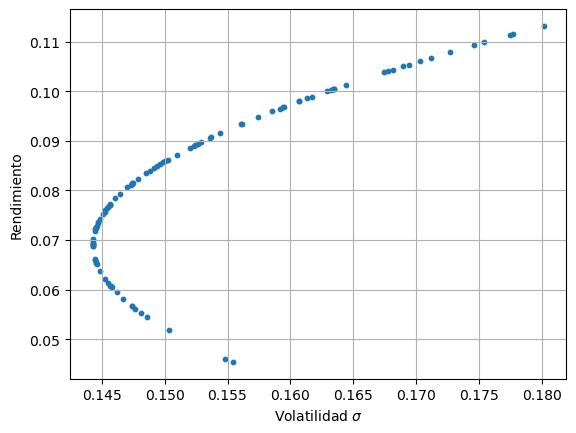

In [49]:
# Grafica
plt.scatter(df['volatilidades_anual'], df['rendimientos_anual'], s=10)
plt.xlabel('Volatilidad $\sigma$')
plt.ylabel('Rendimiento')
plt.grid()

## La forma matricial nos ayuda a hacerlo cuando hacemos el calculo para varios activos

¿Cómo se ve con 3 activos o más?


In [69]:
# Parametros para la función
tickers = ['VOO', 'VEA', 'VNQ', 'VWO']
start_date = '2015-01-01'

St = yf.download(tickers, start=start_date)['Close']

[*********************100%%**********************]  4 of 4 completed


In [70]:
# Obtenga los rendimientos
rt = St.pct_change()

In [71]:
# Simula un portafolio
random_portafolio(rt)

(0.00025738856340148193,
 0.011008623153153605,
 array([0.08928838, 0.22936147, 0.42634929, 0.25500087]))

In [72]:
# Simula 100 portafolios, anualizalos
# Simula 100 portafolios, anualizalos
rend=[]
vol = []
pesos = []
for i in range(10000):
    rendimiento_i, volatilidad_i, w_i = random_portafolio(rt)
    rend.append(rendimiento_i)
    vol.append(volatilidad_i)
    pesos.append(w_i)
    
df = pd.DataFrame({
    'rendimientos':rend,
    'volatilidades':vol,
    'pesos':pesos
})
df['rendimientos_anual'] = df['rendimientos'] * 252
df['volatilidades_anual'] = df['volatilidades'] * np.sqrt(252)
df

,rendimientos,volatilidades,pesos,rendimientos_anual,volatilidades_anual
0,0.000190,0.011266,"[0.19015578393774046, 0.09349279328362427, 0.2...",0.047918,0.178843
1,0.000153,0.011390,"[0.035699036486574055, 0.24780649435202803, 0....",0.038456,0.180812
2,0.000243,0.010973,"[0.18028716463322153, 0.2766675756398547, 0.36...",0.061227,0.174191
3,0.000185,0.011192,"[0.20122554207641424, 0.4476719263049308, 0.19...",0.046609,0.177663
4,0.000173,0.010913,"[0.5096121138617208, 0.2851989150747204, 0.104...",0.043575,0.173235
...,...,...,...,...,...
9995,0.000153,0.011002,"[0.34876700440714914, 0.31844542305670276, 0.0...",0.038586,0.174644
9996,0.000211,0.010960,"[0.21777703214819638, 0.23073054324722853, 0.2...",0.053297,0.173981
9997,0.000202,0.010987,"[0.2200462396616933, 0.3098084162975229, 0.244...",0.050944,0.174413
9998,0.000200,0.010899,"[0.6268371341249976, 0.10245474829993126, 0.16...",0.050433,0.173012


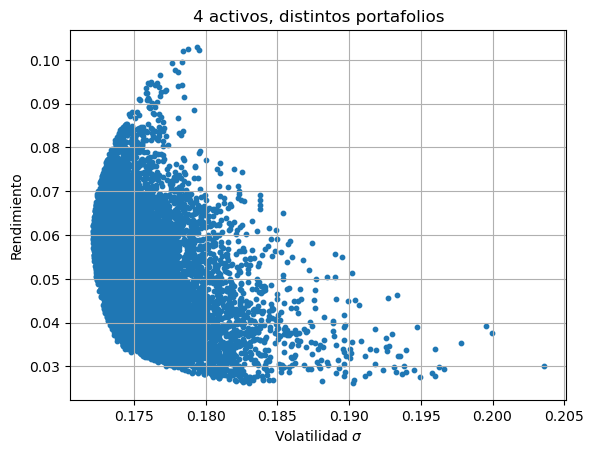

In [73]:
# Grafique los portafolios
plt.scatter(df['volatilidades_anual'], df['rendimientos_anual'], s=10)
plt.xlabel('Volatilidad $\sigma$')
plt.ylabel('Rendimiento')
plt.title('4 activos, distintos portafolios')
plt.grid()

In [79]:
# Obtenga el de minima varianza
min_variance = df[df.volatilidades_anual == df.volatilidades_anual.min()]
min_variance

,rendimientos,volatilidades,pesos,rendimientos_anual,volatilidades_anual
8519,0.000231,0.010843,"[0.5016085618189966, 0.16348988222397434, 0.27...",0.058289,0.17213


# ¿Qué pasa si no necesariamente quiero la mínima varianza?

- Quiero tener un rendimiento de 7% con el menor riesgo posible, no estoy interesado si ese es el de varianza mínima 

In [82]:
df_7 = df[df.rendimientos_anual >= 0.07]

portafolio_deseado = df_7[df_7.volatilidades_anual == df_7.volatilidades_anual.min()]
portafolio_deseado.pesos.values

array([array([0.40214228, 0.10594287, 0.42432106, 0.06759379])],
      dtype=object)